In [ ]:
import pandas as pd

# Membaca data dari folder data/01_raw
df = pd.read_csv('../data/01_raw/criminal_data.csv')

# Menampilkan 5 baris pertama
df.head()


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,5/10/2015 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,5/10/2015 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,5/10/2015 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,5/10/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,5/10/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [8]:
print(df.shape)  # Menampilkan dimensi DataFrame

(884262, 7)


In [9]:
print(df.columns)  # Menampilkan nama-nama kolom

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')


In [10]:
print(df.info())  # Menampilkan informasi umum tentang DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB
None


### 🧾 Informasi Umum Dataset

Berikut adalah hasil pemeriksaan struktur DataFrame menggunakan `df.info()`:

- **Jumlah entri (baris):** 884.262
- **Jumlah kolom:** 7
- **Ukuran memori:** ~47.2 MB

| No. | Nama Kolom   | Non-Null | Tipe Data | Keterangan                         |
|-----|--------------|----------|-----------|------------------------------------|
| 1   | Id           | 884.262  | int64     | ID unik tiap kejadian              |
| 2   | Dates        | 884.262  | object    | Waktu kejadian      |
| 3   | DayOfWeek    | 884.262  | object    | Hari kejadian (Senin s.d. Minggu)  |
| 4   | PdDistrict   | 884.262  | object    | Distrik kepolisian                 |
| 5   | Address      | 884.262  | object    | Alamat kejadian                    |
| 6   | X            | 884.262  | float64   | Longitude lokasi kejadian          |
| 7   | Y            | 884.262  | float64   | Latitude lokasi kejadian           |

### ✅ Kesimpulan

- Tidak ada nilai kosong (`null`) di seluruh kolom.
- Kolom `Dates` masih bertipe `object`, sehingga perlu preprocessing untuk mengubah data ke `datetime` agar dapat dilakukan analisis waktu.
- Kolom lokasi (`X`, `Y`) siap digunakan untuk **visualisasi spasial** (seperti heatmap lokasi).

In [12]:
print(df['PdDistrict'].value_counts())  # frekuensi kategori

PdDistrict
SOUTHERN      157456
MISSION       120449
NORTHERN      107017
BAYVIEW        89591
CENTRAL        86130
TENDERLOIN     81747
INGLESIDE      80084
TARAVAL        66617
PARK           50199
RICHMOND       44972
Name: count, dtype: int64


### 📍 Distribusi Kejadian Kriminal berdasarkan Distrik Polisi (`PdDistrict`)

Berikut adalah jumlah kejadian kriminal yang tercatat di masing-masing distrik di San Francisco selama periode data:

| No. | Distrik       | Jumlah Kejadian |
|-----|---------------|-----------------|
| 1   | SOUTHERN      | 157,456         |
| 2   | MISSION       | 120,449         |
| 3   | NORTHERN      | 107,017         |
| 4   | BAYVIEW       | 89,591          |
| 5   | CENTRAL       | 86,130          |
| 6   | TENDERLOIN    | 81,747          |
| 7   | INGLESIDE     | 80,084          |
| 8   | TARAVAL       | 66,617          |
| 9   | PARK          | 50,199          |
| 10  | RICHMOND      | 44,972          |

### 🧠 Insight

-  **Distrik Southern** memiliki jumlah kejadian kriminal terbanyak, yaitu lebih dari **150 ribu kejadian**. Kemungkinan besar karena lokasinya yang padat dan menjadi pusat kegiatan kota.
- **Distrik Richmond dan Park** merupakan dua distrik dengan jumlah kejadian kriminal paling sedikit.
```

In [13]:
print(df.isnull().sum()) # Menampilkan jumlah nilai yang hilang di setiap kolom

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64


### 🧹 Pemeriksaan Nilai Hilang (Missing Values)

Eksplorasi data juga dilakukan dengan memeriksa apakah terdapat nilai kosong (missing value) di setiap kolom. Hasilnya adalah sebagai berikut:

| Kolom       | Jumlah Missing Value |
|-------------|----------------------|
| Id          | 0                    |
| Dates       | 0                    |
| DayOfWeek   | 0                    |
| PdDistrict  | 0                    |
| Address     | 0                    |
| X (Longitude) | 0                  |
| Y (Latitude)  | 0                  |

### ✅ Kesimpulan

- Tidak ditemukan nilai kosong pada dataset.
- Semua kolom memiliki data yang lengkap sehingga **tidak perlu dilakukan imputasi atau pembersihan** terkait missing value.
```

In [15]:
subset_cols = ['Dates', 'PdDistrict', 'Address', 'X', 'Y']
print(df.duplicated(subset=subset_cols).sum())  # Menampilkan jumlah baris duplikat berdasarkan subset kolom tertentu

188352


### 🔍 Temuan Awal: Duplikasi Data

Selama proses eksplorasi data, ditemukan **188.352 baris data duplikat** berdasarkan kombinasi kolom:

- `Dates` (waktu kejadian)
- `PdDistrict` (distrik kepolisian)
- `Address` (alamat kejadian)
- `X`, `Y` (koordinat lokasi)

Hal ini menunjukkan bahwa ada banyak entri yang mencatat kejadian kriminal yang identik, baik karena pencatatan ganda maupun duplikasi saat pengumpulan data.
```

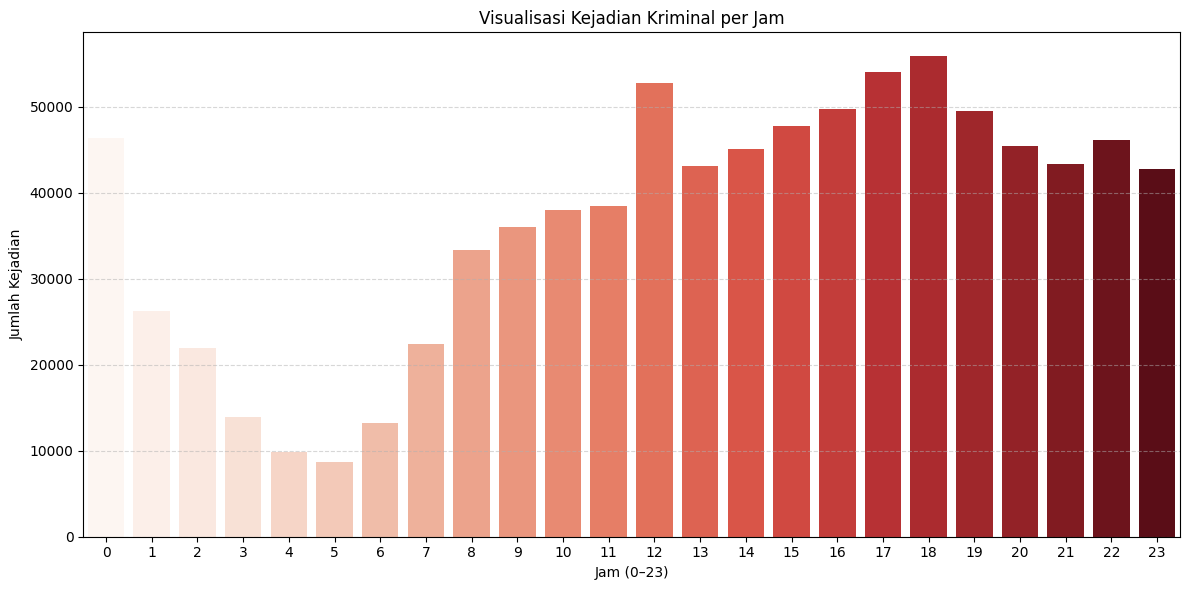

In [32]:
# Hitung jumlah kejadian per jam
criminal_hour = df['Dates'].dt.hour.value_counts().sort_index()

# Ubah menjadi DataFrame
criminal_hour_df = pd.DataFrame({
    'Jam': criminal_hour.index,
    'Jumlah Kejadian': criminal_hour.values
})

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Jam',
    y='Jumlah Kejadian',
    hue='Jam',                 
    data=criminal_hour_df,
    palette='Reds',
    legend=False              
)
plt.title('Visualisasi Kejadian Kriminal per Jam')
plt.xlabel('Jam (0–23)')
plt.ylabel('Jumlah Kejadian')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## ⏱️ Analisis Waktu Kejadian Kriminal per Jam

Setelah melakukan konversi kolom `Dates` ke dalam format datetime, dilakukan analisis distribusi kejadian kriminal berdasarkan jam.

### 📅 Rentang Waktu Data:
Data mencakup kejadian kriminal dari:
**1 Januari 2003** hingga **10 Mei 2015**, mencakup periode lebih dari 12 tahun.

